# 🧾 Final Conclusion

## Bar Plot: Average CAC by Marketing Channel

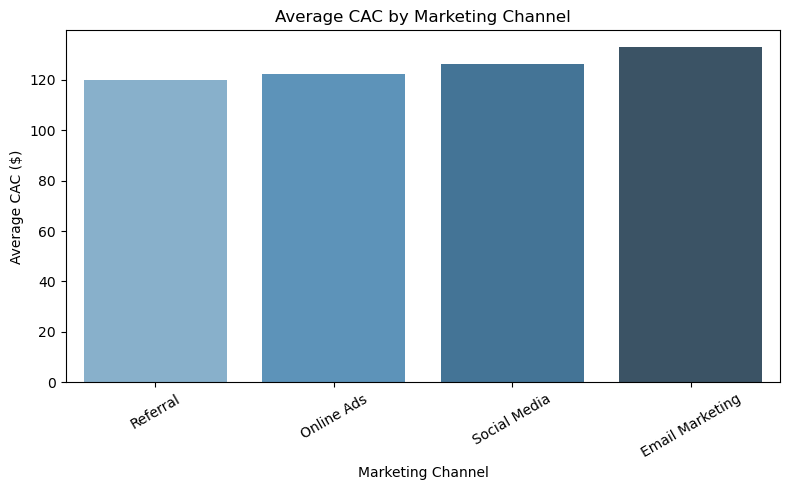

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated data
df = pd.read_csv("updated_customer_data_with_cac.csv")

# Bar Plot: Average CAC by channel
avg_cac_by_channel = df.groupby('Marketing_Channel')['CAC'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_cac_by_channel.index, y=avg_cac_by_channel.values, palette='Blues_d')
plt.title("Average CAC by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Average CAC ($)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Scatter Plot: Marketing Spend vs New Customers

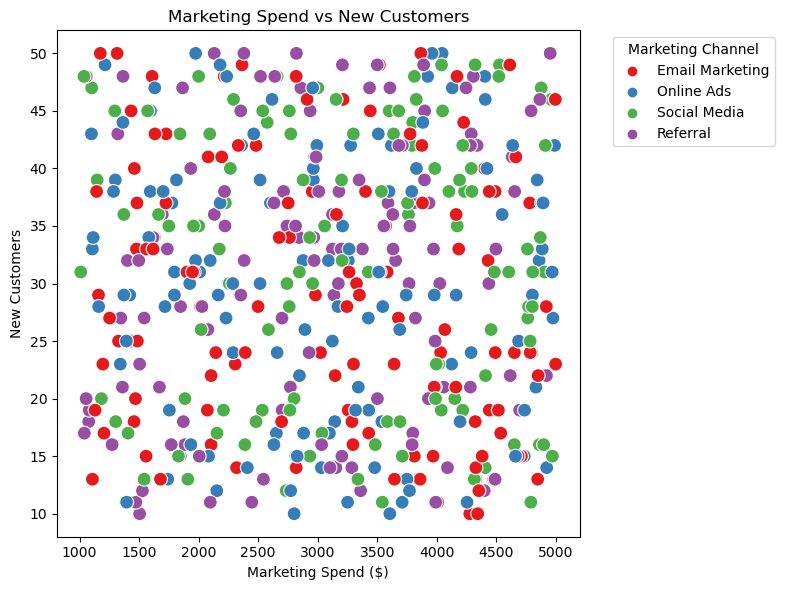

In [2]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='New_Customers', hue='Marketing_Channel', palette='Set1', s=100)
plt.title("Marketing Spend vs New Customers")
plt.xlabel("Marketing Spend ($)")
plt.ylabel("New Customers")
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Heatmap: CAC and Performance Score by Channel

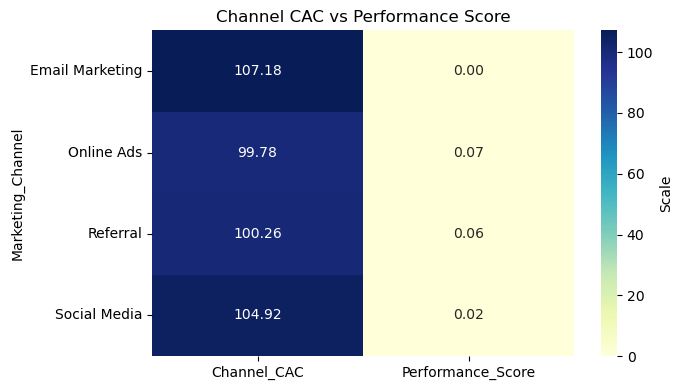

In [4]:
# Calculate summary stats
summary = df.groupby('Marketing_Channel').agg({
    'Marketing_Spend': 'sum',
    'New_Customers': 'sum',
    'CAC': 'mean'
}).reset_index()

summary['Channel_CAC'] = summary['Marketing_Spend'] / summary['New_Customers']
summary['Performance_Score'] = (1 - (summary['Channel_CAC'] / summary['Channel_CAC'].max())).round(2)

# Prepare heatmap data
heatmap_data = summary[['Marketing_Channel', 'Channel_CAC', 'Performance_Score']].set_index('Marketing_Channel')

plt.figure(figsize=(7, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Scale'})
plt.title("Channel CAC vs Performance Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Show Summary Table

In [5]:
# Display the final performance table
summary_sorted = summary.sort_values(by='Performance_Score', ascending=False)
summary_sorted[['Marketing_Channel', 'Marketing_Spend', 'New_Customers', 'Channel_CAC', 'Performance_Score']]


,Marketing_Channel,Marketing_Spend,New_Customers,Channel_CAC,Performance_Score
1,Online Ads,388747.870216,3896,99.781281,0.07
2,Referral,391420.513166,3904,100.261402,0.06
3,Social Media,383160.250918,3652,104.917922,0.02
0,Email Marketing,384034.640089,3583,107.182428,0.00
